In [18]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
dados_conexao = (
    "Driver={SQL Server};"
    "Server=DESKTOP-2K9QLKU\SQLSERVER;"
    "Database=AdventureWorksDW2022;"
)
conexao = pyodbc.connect(dados_conexao)
print("Conexao bem sucedida")

Conexao bem sucedida


<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ANTONIO NETO\AppData\Local\Temp\ipykernel_71692\934800227.py:6: SyntaxWarning: invalid escape sequence '\S'
  "Server=DESKTOP-2K9QLKU\SQLSERVER;"


In [19]:

sql_query = '''
WITH VendasMensais AS (
    SELECT 
        DATEPART(YEAR, d.FullDateAlternateKey) AS Ano,
        DATEPART(MONTH, d.FullDateAlternateKey) AS Mes,
        CONCAT(DATEPART(YEAR, d.FullDateAlternateKey), '-', RIGHT('0' + CAST(DATEPART(MONTH, d.FullDateAlternateKey) AS nvarchar(2)), 2)) AS AnoMes,
        pc.EnglishProductCategoryName AS CategoriaProduto,
        SUM(fis.OrderQuantity) AS QuantidadeTotalVendas
    FROM 
        dbo.FactInternetSales fis
    JOIN 
        dbo.DimDate d ON fis.OrderDateKey = d.DateKey
    JOIN 
        dbo.DimProduct dp ON fis.ProductKey = dp.ProductKey
    JOIN 
        dbo.DimProductSubcategory dps ON dp.ProductSubcategoryKey = dps.ProductSubcategoryKey
    JOIN 
        dbo.DimProductCategory pc ON dps.ProductCategoryKey = pc.ProductCategoryKey
    WHERE 
        DATEPART(YEAR, d.FullDateAlternateKey) IN (2013, 2014)
    GROUP BY 
        DATEPART(YEAR, d.FullDateAlternateKey),
        DATEPART(MONTH, d.FullDateAlternateKey),
        CONCAT(DATEPART(YEAR, d.FullDateAlternateKey), '-', RIGHT('0' + CAST(DATEPART(MONTH, d.FullDateAlternateKey) AS nvarchar(2)), 2)),
        pc.EnglishProductCategoryName
)
SELECT
    AnoMes,
    CategoriaProduto,
    QuantidadeTotalVendas
FROM
    VendasMensais
ORDER BY
    CategoriaProduto, AnoMes
'''
 
dados = pd.read_sql(sql_query, conexao)
conexao.close()

C:\Users\ANTONIO NETO\AppData\Local\Temp\ipykernel_71692\353241090.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dados = pd.read_sql(sql_query, conexao)


In [21]:
print(dados.head())

    AnoMes CategoriaProduto  QuantidadeTotalVendas
0  2013-01      Accessories                    931
1  2013-02      Accessories                   2415
2  2013-03      Accessories                   2771
3  2013-04      Accessories                   2705
4  2013-05      Accessories                   2941


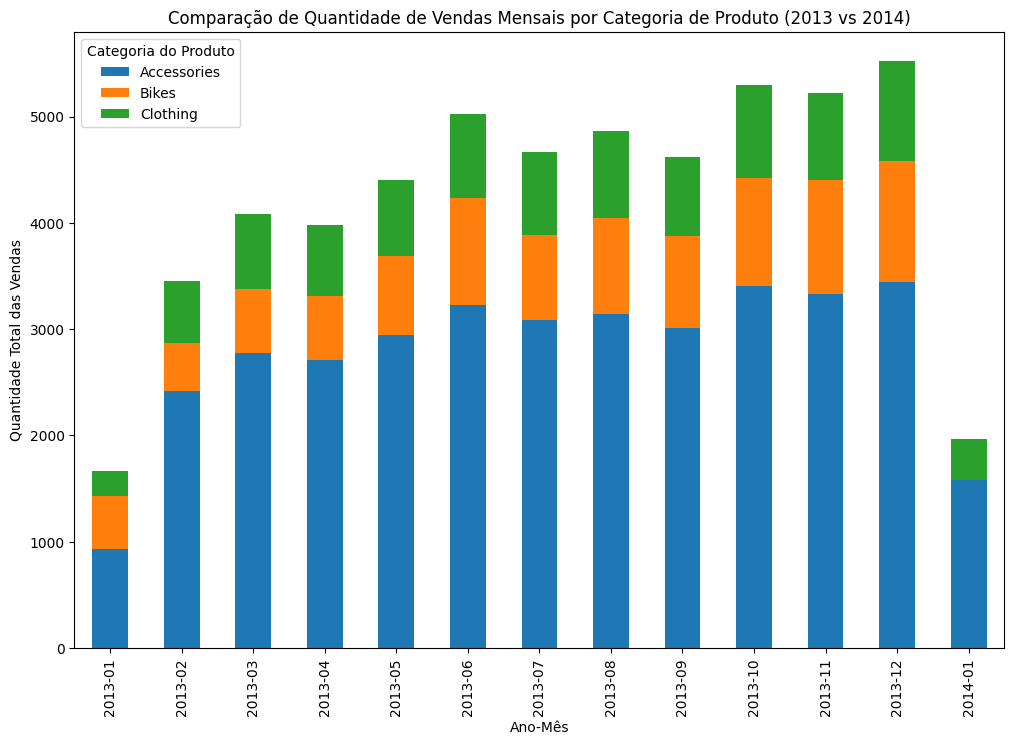

In [23]:

pivot_df = dados.pivot_table(index='AnoMes', columns='CategoriaProduto', values='QuantidadeTotalVendas', aggfunc='sum')

pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Comparação de Quantidade de Vendas Mensais por Categoria de Produto (2013 vs 2014)')
plt.xlabel('Ano-Mês')
plt.ylabel('Quantidade Total das Vendas')
plt.legend(title='Categoria do Produto')
plt.show()